In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define path name to the excel file and save as df 
path_to_apps = "/Users/richardwsong/Desktop/bh2025_reg.xlsx"
df = pd.read_excel(path_to_apps)

# Retrieve the consent to use data for statistical purposes (column 25). Only include rows where the value is "Yes"
df = df[df.iloc[:, 25] == "Yes"]

,Timestamp,Email Address,Have you ever participated in a Brainhack/Hackathon?,Name and surname(s),Institutional email address (your institutional email is required to verify your affiliation and grant access to the event),Affiliation (institute or department),GitHub account,Preferred pronouns,Do you consider yourself a member of any of the following traditionally underrepresented groups in science?,Career level,...,"During the BrainHack Vanderbilt, I would like to learn more about the following methods:",Do you give the Vandy Brainhack Organizing Committee the consent to use your anonymized data for statistical purposes?,All the talks and tutorials will be held on Zoom and they may be recorded. The videos may be shared on the Brainhack Global channels. Attendees' thumbnail windows and name tags might appear in the videos.,Code of Conduct (https://brainhack.org/code-of-conduct),Will you be attending in-person or virtually?,Do you have any access needs or disability accommodations that you would like us to know about?,Do you have any dietary restrictions?,T-Shirt Size Selection,Would you like to volunteer for BrainHack Vanderbilt 2024?,"We understand that plans can change, and we appreciate your cooperation in letting us know your availability. We want to ensure that everyone who wishes to attend has the opportunity to do so. To help us manage attendance effectively, we will be sending out a confirmation email one week before the event. \n\n""If I do not respond to this confirmation email, I acknowledge that my place at the event may be forfeited and given to an individual on the waitlist."""
0,2024-11-19 17:31:53.527,sunny.a.bhatt@vanderbilt.edu,No,Sunny Bhatt,sunny.a.bhatt@vanderbilt.edu,Department of Computer Science,https://github.com/sbhatt26,He/him/his,NaN,Graduate student,...,"Causality, Deep Learning, Granger Causality, H...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,Vegan but do consume dairy products but not eggs,S,No,I have read the above statement and accept it.
1,2024-11-20 11:02:06.993,Amanda.Martinez-Lincoln@vanderbilt.edu,Yes,Amanda Martinez-Lincoln,Amanda.Martinez-Lincoln@vanderbilt.edu,"Special Education, Brain Institute",NaN,She/her/hers,"Women, Caregiver",Postdoc,...,"Modelling, MR Methodologies, Statistical Model...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,NaN,M,No,I have read the above statement and accept it.
2,2024-11-20 11:03:55.166,sarah.hughes-berheim@vanderbilt.edu,Yes,Sarah Hughes Berheim,sarah.hughes-berheim@vanderbilt.edu,Special Education,NaN,She/her/hers,Women,Postdoc,...,"Diversity Inclusivity Equality, EEG Event rela...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,Celiac Disease!,Gluten Free,L,No,I have read the above statement and accept it.
3,2024-11-20 11:28:06.991,deep.pankaj.shah@vanderbilt.edu,No,Deep Shah,deep.pankaj.shah@vanderbilt.edu,M.eng in Construction Management,.,He/him/his,NaN,Graduate student,...,"Bayesian Approaches, Causality, Connectome, Da...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,Vegeterian,L,Yes,I have read the above statement and accept it.
4,2024-11-20 13:18:21.376,clair.hong@vanderbilt.edu,Yes,Clair Hong,clair.hong@vanderbilt.edu,"VU, Dept of Special Education",mkclairhong,She/her/hers,Women,Postdoc,...,"Bayesian Approaches, Causality, Connectome, Da...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,NaN,M,No,I have read the above statement and accept it.


## Demographic Info

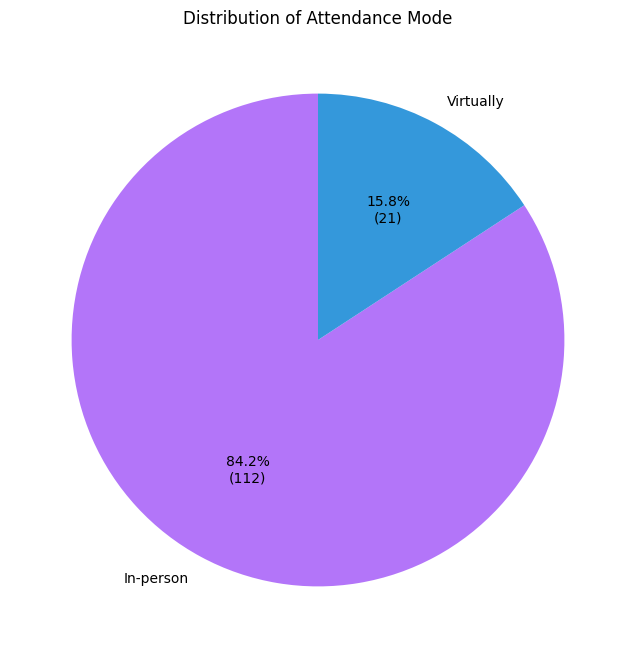

In [118]:
# Get attendance mode distribution
attendance_distribution = df['Will you be attending in-person or virtually?'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['#b375f9', '#3498db']  # Using the same colors as before: purple for in-person, blue for virtual

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

plt.pie(attendance_distribution.values, 
        labels=attendance_distribution.index, 
        colors=colors,
        autopct=autopct_format(attendance_distribution.values), 
        startangle=90)

plt.title('Distribution of Attendance Mode')
plt.show()

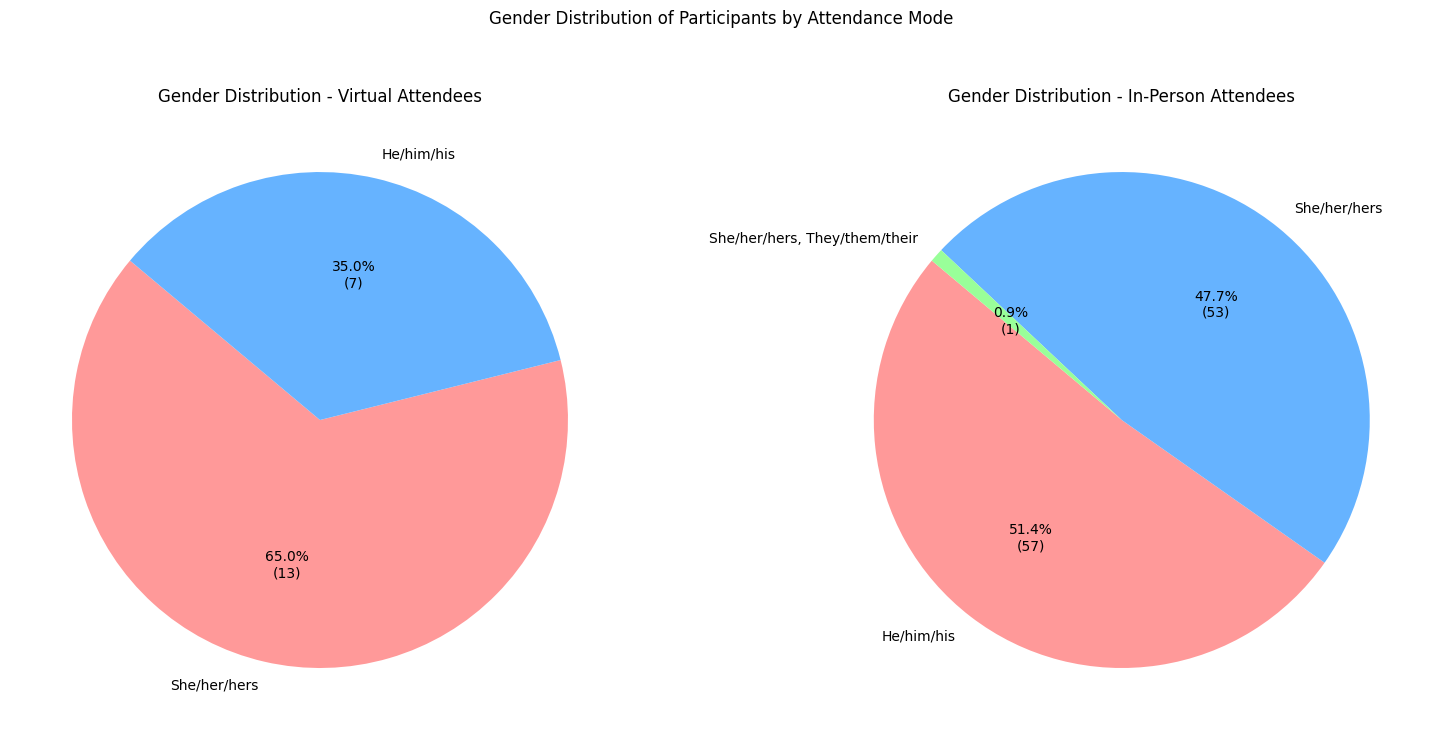

In [90]:
def distribution_count(column, mode_df):
    count = mode_df[column].value_counts()
    return count

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

# Split data by attendance mode
virtual_df = df[df['Will you be attending in-person or virtually?'] == 'Virtually']
in_person_df = df[df['Will you be attending in-person or virtually?'] == 'In-person']

# Get distributions for both modes
virtual_distribution = distribution_count("Preferred pronouns", virtual_df)
in_person_distribution = distribution_count("Preferred pronouns", in_person_df)

# Drop 'Prefer not to say' from both distributions if present
if 'Prefer not to say' in virtual_distribution.index:
    virtual_distribution.drop(labels=['Prefer not to say'], inplace=True)
if 'Prefer not to say' in in_person_distribution.index:
    in_person_distribution.drop(labels=['Prefer not to say'], inplace=True)

# Create subplots for the two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

colors = ['#ff9999','#66b3ff','#99ff99']

# Create the virtual attendees pie chart
ax1.pie(virtual_distribution.values, labels=virtual_distribution.index, 
        colors=colors, autopct=autopct_format(virtual_distribution.values), startangle=140)
ax1.set_title('Gender Distribution - Virtual Attendees')

# Create the in-person attendees pie chart
ax2.pie(in_person_distribution.values, labels=in_person_distribution.index, 
        colors=colors, autopct=autopct_format(in_person_distribution.values), startangle=140)
ax2.set_title('Gender Distribution - In-Person Attendees')

plt.suptitle('Gender Distribution of Participants by Attendance Mode', y=1.05)
plt.tight_layout()
plt.show()

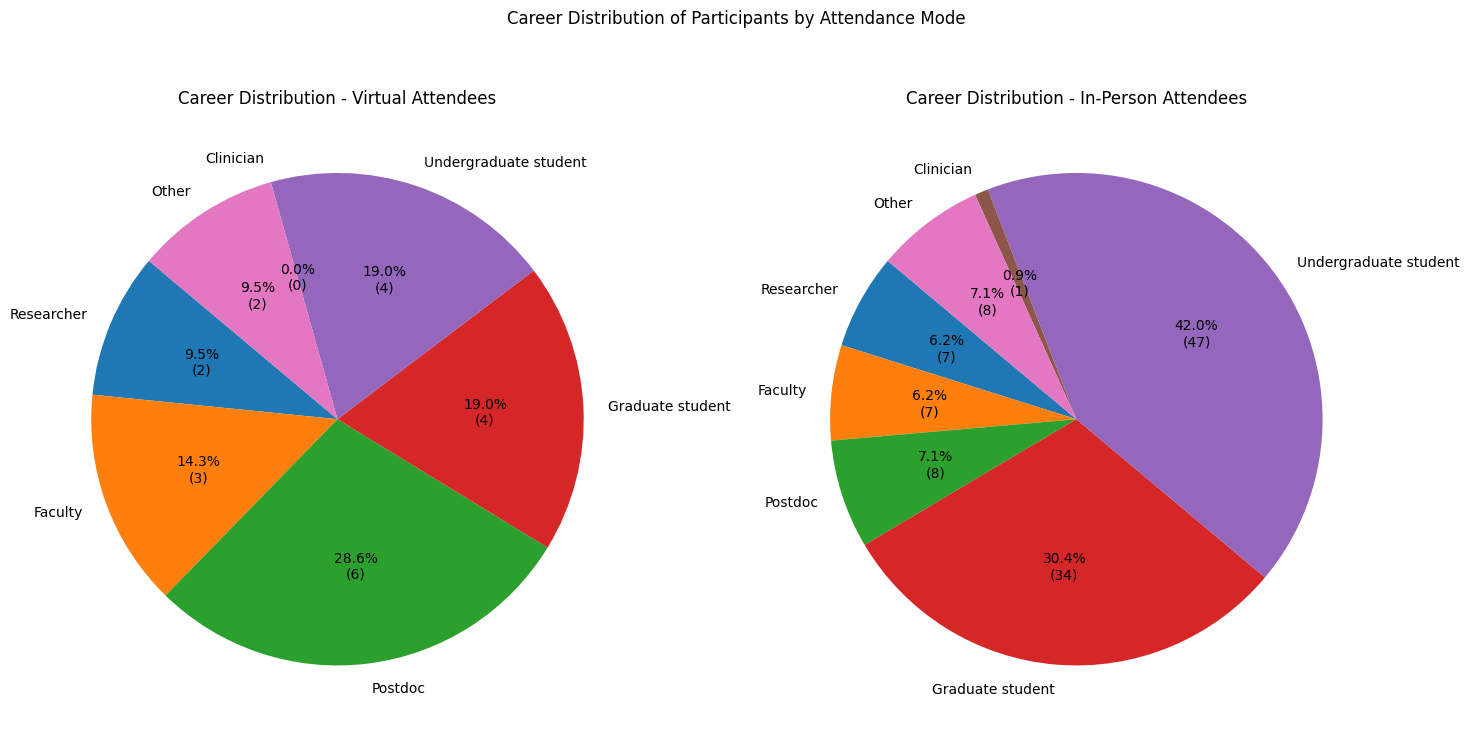

In [93]:
def distribution_count(column, mode_df):
    count = mode_df[column].value_counts()
    return count

def autopct_format(values):
    def my_format(pct):
        total = sum(v for v in values if not pd.isna(v))  # Skip NaN values when calculating total
        if total == 0:
            return ''
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

# Split data by attendance mode and drop NaN values
virtual_df = df[df['Will you be attending in-person or virtually?'] == 'Virtually'].dropna(subset=['Career level'])
in_person_df = df[df['Will you be attending in-person or virtually?'] == 'In-person'].dropna(subset=['Career level'])

# Get distributions for both modes
virtual_distribution = distribution_count("Career level", virtual_df)
in_person_distribution = distribution_count("Career level", in_person_df)

# Define main categories
main_categories = ['Researcher', 'Faculty', 'Postdoc', 'Graduate student', 'Undergraduate student', 'Clinician']
lab = main_categories + ['Other']

# Process sizes for virtual distribution
virtual_sizes = []
for category in main_categories:
    value = virtual_distribution.get(category, 0)
    virtual_sizes.append(0 if pd.isna(value) else value)
# Add "Other" category for virtual
virtual_other = sum(virtual_distribution.get(cat, 0) for cat in virtual_distribution.index 
                   if cat not in main_categories and not pd.isna(virtual_distribution.get(cat, 0)))
virtual_sizes.append(virtual_other)

# Process sizes for in-person distribution
in_person_sizes = []
for category in main_categories:
    value = in_person_distribution.get(category, 0)
    in_person_sizes.append(0 if pd.isna(value) else value)
# Add "Other" category for in-person
in_person_other = sum(in_person_distribution.get(cat, 0) for cat in in_person_distribution.index 
                     if cat not in main_categories and not pd.isna(in_person_distribution.get(cat, 0)))
in_person_sizes.append(in_person_other)

# Create subplots for the two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Only create pie charts if there's data
if sum(virtual_sizes) > 0:
    ax1.pie(virtual_sizes, labels=lab, autopct=autopct_format(virtual_sizes), startangle=140)
    ax1.set_title('Career Distribution - Virtual Attendees')
else:
    ax1.text(0.5, 0.5, 'No data available', ha='center', va='center')
    ax1.set_title('Career Distribution - Virtual Attendees')

if sum(in_person_sizes) > 0:
    ax2.pie(in_person_sizes, labels=lab, autopct=autopct_format(in_person_sizes), startangle=140)
    ax2.set_title('Career Distribution - In-Person Attendees')
else:
    ax2.text(0.5, 0.5, 'No data available', ha='center', va='center')
    ax2.set_title('Career Distribution - In-Person Attendees')

plt.suptitle('Career Distribution of Participants by Attendance Mode', y=1.05)
plt.tight_layout()
plt.show()

{'Women': 51, 'Caregiver': 4, 'LGBTQI+': 15, 'Disabled': 2, 'Neurodiverse': 12, 'rural hometown': 1, 'Underrepresented country (based outside Europe & North America)': 16, 'Prefer not to say': 8, 'Non-Europrean ancenstry': 18, 'Latina': 1, 'first-gen college student': 1, 'questbridge': 1, 'first-generation college student': 1, 'None': 1}


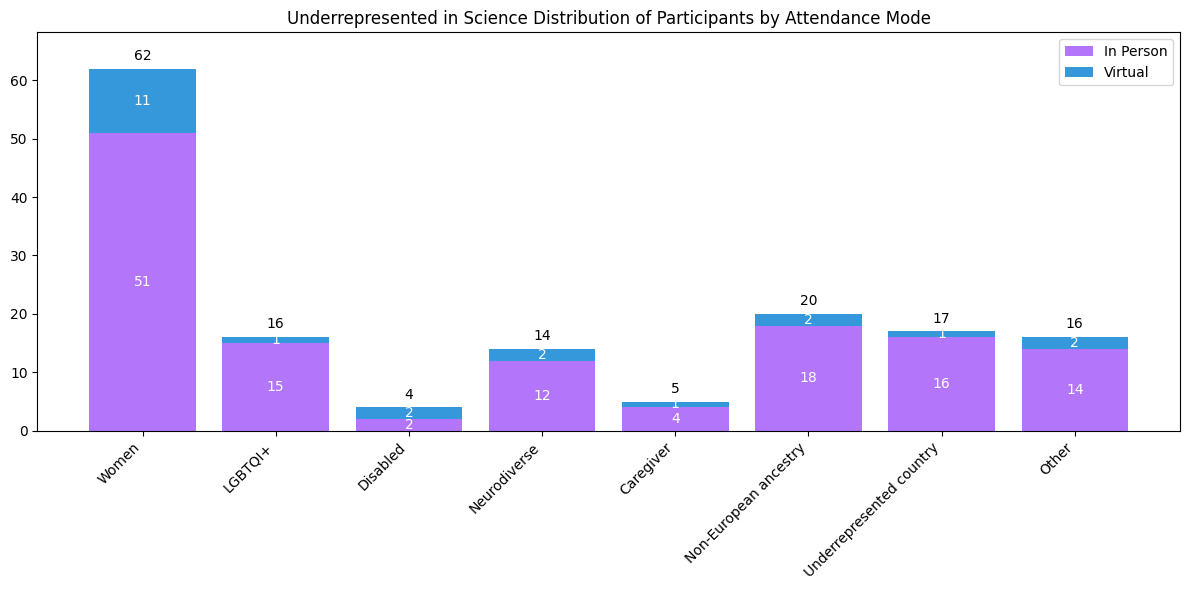

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Create separate dictionaries for in-person and virtual attendees
dei_in_person = dict()
dei_virtual = dict()

question = 'Do you consider yourself a member of any of the following traditionally underrepresented groups in science?'
attendance_col = 'Will you be attending in-person or virtually?'  # Replace with your actual column name

# Process the data
for idx, row in df[[question, attendance_col]].dropna().iterrows():
    groups = row[question].split(", ")
    is_virtual = row[attendance_col].lower() == 'virtually'  # Adjust condition based on your data values
    
    # Target dictionary based on attendance mode
    target_dict = dei_virtual if is_virtual else dei_in_person
    
    for group in groups:
        if group in target_dict:
            target_dict[group] += 1
        else:
            target_dict[group] = 1

print(dei_in_person)

# Define the labels to keep
labels = ["Women", "LGBTQI+", "Disabled", "Neurodiverse", "Caregiver", 
          "Non-Europrean ancenstry", "Underrepresented country (based outside Europe & North America)"]

# Calculate "Other" category for both in-person and virtual
other_in_person = sum(value for key, value in dei_in_person.items() if key not in labels)
other_virtual = sum(value for key, value in dei_virtual.items() if key not in labels)

# Filter and create final dictionaries
dei_in_person_filtered = {key: dei_in_person.get(key, 0) for key in labels}
dei_virtual_filtered = {key: dei_virtual.get(key, 0) for key in labels}

# Add "Other" category
dei_in_person_filtered["Other"] = other_in_person
dei_virtual_filtered["Other"] = other_virtual

# Rename the long label
labels.append("Other")
labels = [label.replace("Underrepresented country (based outside Europe & North America)", 
                       "Underrepresented country") for label in labels]

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Get the values in the same order as labels
in_person_values = [dei_in_person_filtered.get(label.replace("Underrepresented country", 
                   "Underrepresented country (based outside Europe & North America)"), 0) for label in labels]
virtual_values = [dei_virtual_filtered.get(label.replace("Underrepresented country", 
                 "Underrepresented country (based outside Europe & North America)"), 0) for label in labels]

# Create the stacked bars
labels = [label.replace("Non-Europrean ancenstry", "Non-European ancestry") for label in labels]
bars_in_person = plt.bar(labels, in_person_values, label='In Person', color='#b375f9')
bars_virtual = plt.bar(labels, virtual_values, bottom=in_person_values, label='Virtual', color='#3498db')

plt.xticks(rotation=45, ha='right')
plt.title('Underrepresented in Science Distribution of Participants by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i in range(len(labels)):
    # In-person count
    if in_person_values[i] > 0:
        plt.text(i, in_person_values[i]/2, str(int(in_person_values[i])), 
                ha='center', va='center', color='white')
    
    # Virtual count
    if virtual_values[i] > 0:
        plt.text(i, in_person_values[i] + virtual_values[i]/2, str(int(virtual_values[i])), 
                ha='center', va='center', color='white')

    # Total count
    total = in_person_values[i] + virtual_values[i]
    if total > 0:
        plt.text(i, total + 1, str(int(total)), 
                ha='center', va='bottom', color='black')

plt.ylim(0, max(np.array(in_person_values) + np.array(virtual_values)) * 1.1)
plt.show()

## Previous Skills Background

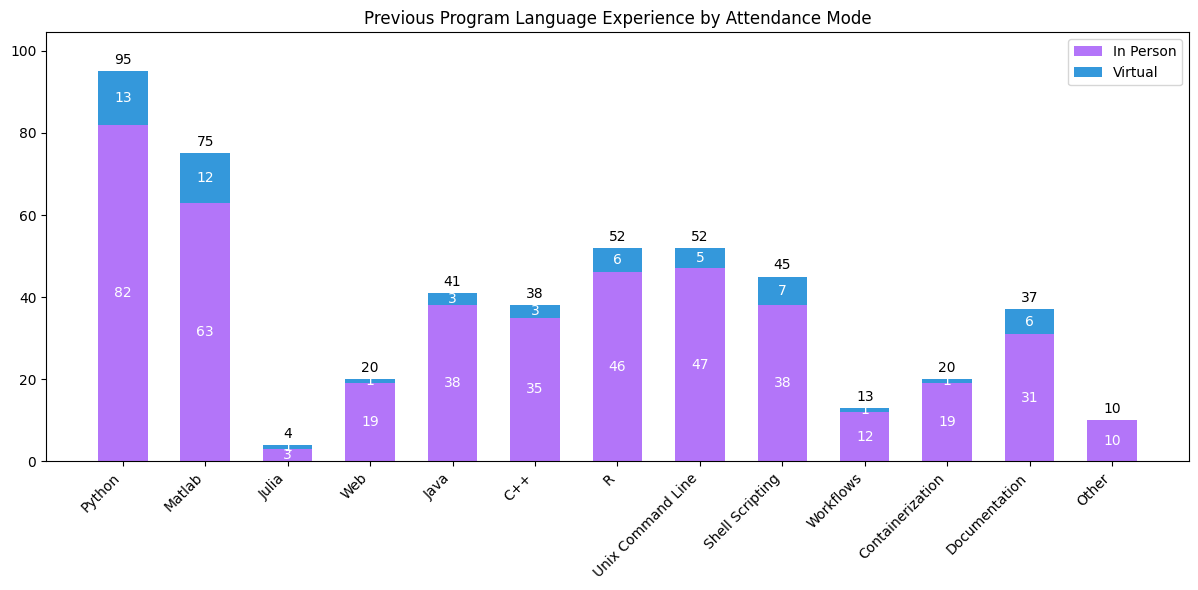

In [100]:
import matplotlib.pyplot as plt

# Function to process programming languages by attendance mode
def get_pl_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    pl_mode = dict()
    question = 'I have experience in the following programming languages:'
    
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in pl_mode:
                pl_mode[j] += 1
            else:
                pl_mode[j] = 1
    return pl_mode

# Get distributions for both modes
virtual_pl = get_pl_by_mode(df, 'Virtually')
in_person_pl = get_pl_by_mode(df, 'In-person')

# Remove unwanted categories from both dictionaries
categories_to_remove = ["None", "It's been a long time since I've used Matlab or R", 
                       "I am currently learning Matlab for a course/research"]
for cat in categories_to_remove:
    virtual_pl.pop(cat, None)
    in_person_pl.pop(cat, None)

# Define main categories
labels = ["Python", "Matlab", "Julia", "Web", "Java", "C++", "R", 
          "Unix Command Line", "Shell Scripting", "Workflows", 
          "Containerization", "Documentation"]

# Process virtual data
virtual_filtered = {key: virtual_pl.get(key, 0) for key in labels}
virtual_filtered["Other"] = sum(value for key, value in virtual_pl.items() if key not in labels)

# Process in-person data
in_person_filtered = {key: in_person_pl.get(key, 0) for key in labels}
in_person_filtered["Other"] = sum(value for key, value in in_person_pl.items() if key not in labels)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Previous Program Language Experience by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

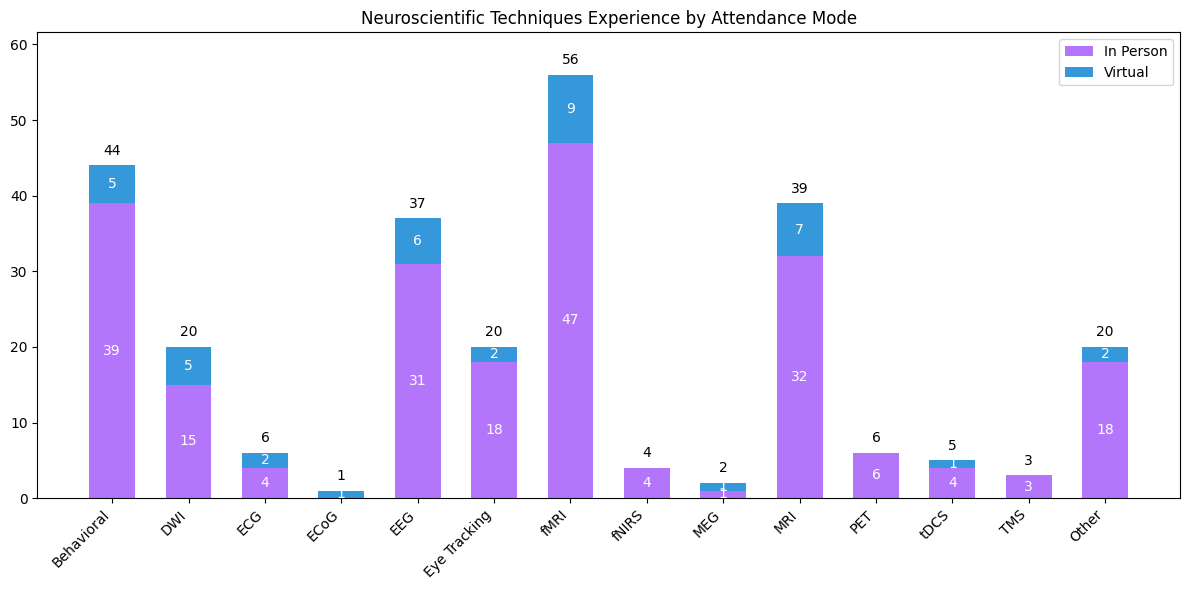

In [102]:
# Function to process neuroscientific techniques by attendance mode
def get_neuro_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    neuro_mode = dict()
    question = 'I have experience in the following neuroscientific techniques :'
    
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in neuro_mode:
                neuro_mode[j] += 1
            else:
                neuro_mode[j] = 1
    return neuro_mode

# Get distributions for both modes
virtual_neuro = get_neuro_by_mode(df, 'Virtually')
in_person_neuro = get_neuro_by_mode(df, 'In-person')

# Remove unwanted categories
for tech in ["None"]:
    virtual_neuro.pop(tech, None)
    in_person_neuro.pop(tech, None)

# Define main categories
labels = [
    "Behavioral",
    "DWI",
    "ECG",
    "ECoG",
    "EEG",
    "Eye Tracking",
    "fMRI",
    "fNIRS",
    "MEG",
    "MRI",
    "PET",
    "tDCS",
    "TMS"
]

# Process virtual data
virtual_filtered = {key: virtual_neuro.get(key, 0) for key in labels}
virtual_filtered["Other"] = sum(value for key, value in virtual_neuro.items() if key not in labels)

# Process in-person data
in_person_filtered = {key: in_person_neuro.get(key, 0) for key in labels}
in_person_filtered["Other"] = sum(value for key, value in in_person_neuro.items() if key not in labels)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Neuroscientific Techniques Experience by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

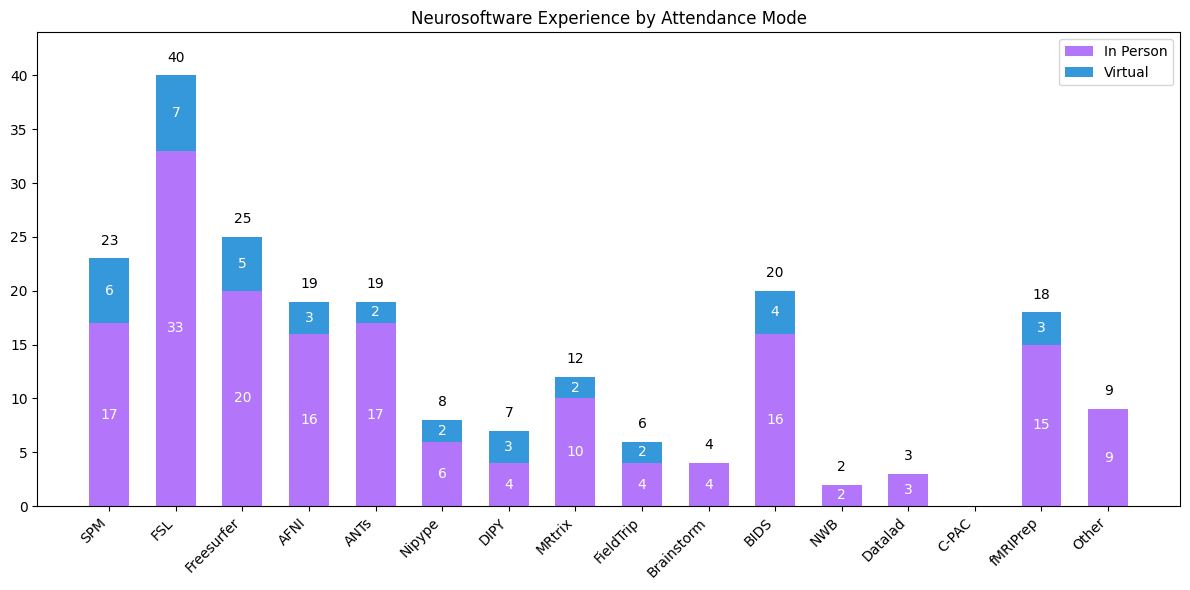

In [103]:
# Function to process neurosoftware by attendance mode
def get_software_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    software_mode = dict()
    question = 'I have experience in the following neurosoftware :'
    
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in software_mode:
                software_mode[j] += 1
            else:
                software_mode[j] = 1
    return software_mode

# Get distributions for both modes
virtual_software = get_software_by_mode(df, 'Virtually')
in_person_software = get_software_by_mode(df, 'In-person')

# Remove unwanted categories
for item in ["None"]:
    virtual_software.pop(item, None)
    in_person_software.pop(item, None)

# Define main categories
neurosoftware_experience = [
    "SPM",
    "FSL",
    "Freesurfer",
    "AFNI",
    "ANTs",
    "Nipype",
    "DIPY",
    "MRtrix",
    "FieldTrip",
    "Brainstorm",
    "BIDS",
    "NWB",
    "Datalad",
    "C-PAC",
    "fMRIPrep",
]

# Process virtual data
virtual_filtered = {key: virtual_software.get(key, 0) for key in neurosoftware_experience}
virtual_filtered["Other"] = sum(value for key, value in virtual_software.items() if key not in neurosoftware_experience)

# Process in-person data
in_person_filtered = {key: in_person_software.get(key, 0) for key in neurosoftware_experience}
in_person_filtered["Other"] = sum(value for key, value in in_person_software.items() if key not in neurosoftware_experience)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Neurosoftware Experience by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

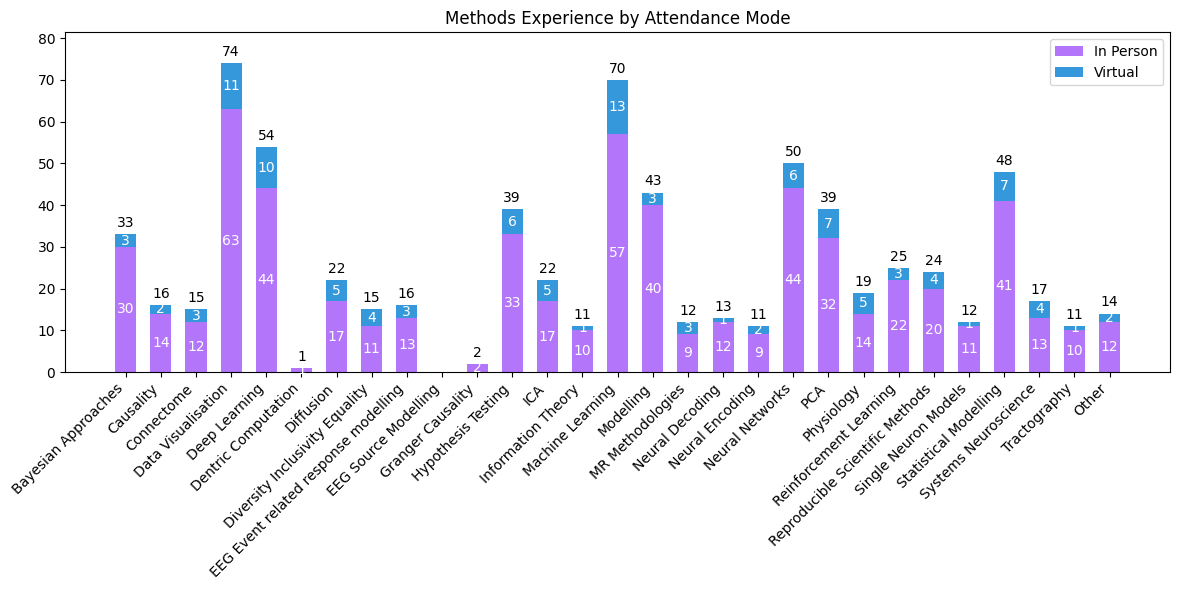

In [104]:
# Function to process methods by attendance mode
def get_methods_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    methods_mode = dict()
    question = 'I have experience in the following methods: '
    
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in methods_mode:
                methods_mode[j] += 1
            else:
                methods_mode[j] = 1
    return methods_mode

# Get distributions for both modes
virtual_methods = get_methods_by_mode(df, 'Virtually')
in_person_methods = get_methods_by_mode(df, 'In-person')

# Remove unwanted categories
for item in ["None"]:
    virtual_methods.pop(item, None)
    in_person_methods.pop(item, None)

# Define main categories
labels = [
    "Bayesian Approaches",
    "Causality",
    "Connectome",
    "Data Visualisation",
    "Deep Learning",
    "Dentric Computation",
    "Diffusion",
    "Diversity Inclusivity Equality",
    "EEG Event related response modelling",
    "EEG Source Modelling",
    "Granger Causality",
    "Hypothesis Testing",
    "ICA",
    "Information Theory",
    "Machine Learning",
    "Modelling",
    "MR Methodologies",
    "Neural Decoding",
    "Neural Encoding",
    "Neural Networks",
    "PCA",
    "Physiology",
    "Reinforcement Learning",
    "Reproducible Scientific Methods",
    "Single Neuron Models",
    "Statistical Modelling",
    "Systems Neuroscience",
    "Tractography",
    "Other"
]

# Process virtual data
virtual_filtered = {key: virtual_methods.get(key, 0) for key in labels}
virtual_filtered["Other"] = sum(value for key, value in virtual_methods.items() if key not in labels)

# Process in-person data
in_person_filtered = {key: in_person_methods.get(key, 0) for key in labels}
in_person_filtered["Other"] = sum(value for key, value in in_person_methods.items() if key not in labels)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Methods Experience by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

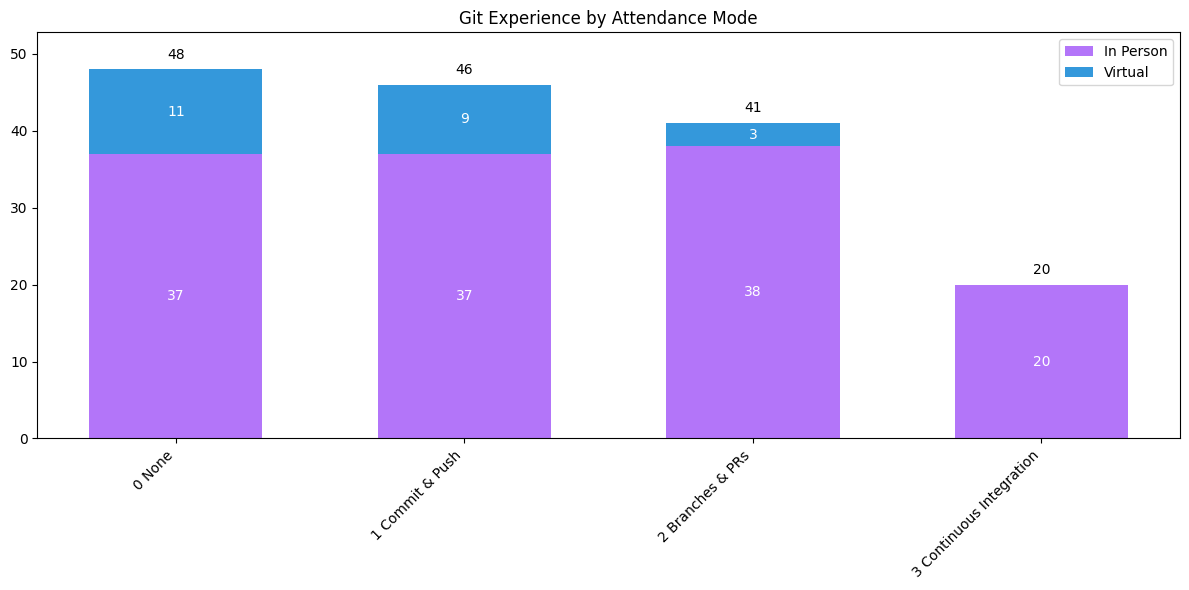

In [105]:
# Function to process Git experience by attendance mode
def get_git_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    git_mode = dict()
    question = 'My experience with Git is...'
    
    for i in mode_df[question].dropna().values:
        # Replace "2 Branches, PRs" with "2 Branches & PRs" before splitting
        i = i.replace("2 Branches, PRs", "2 Branches & PRs")
        result = i.split(", ")
        for j in result:
            if j in git_mode:
                git_mode[j] += 1
            else:
                git_mode[j] = 1
    return git_mode

# Get distributions for both modes
virtual_git = get_git_by_mode(df, 'Virtually')
in_person_git = get_git_by_mode(df, 'In-person')

# Remove unwanted categories
for item in ["None"]:
    virtual_git.pop(item, None)
    in_person_git.pop(item, None)

# Define main categories
labels = [
    "0 None",
    "1 Commit & Push",
    "2 Branches & PRs",
    "3 Continuous Integration"
]

# Process virtual data
virtual_filtered = {key: virtual_git.get(key, 0) for key in labels}

# Process in-person data
in_person_filtered = {key: in_person_git.get(key, 0) for key in labels}

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Git Experience by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

## Desired Experience

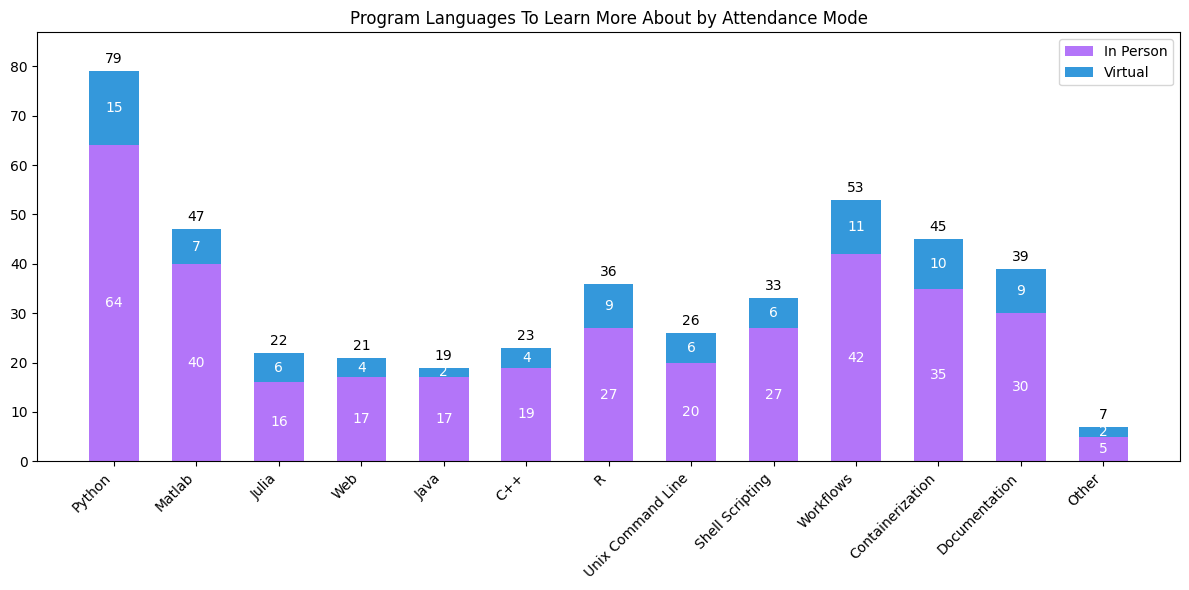

In [106]:
import matplotlib.pyplot as plt

# Function to process programming languages by attendance mode
def get_pl_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    pl_mode = dict()
    question = 'During the BrainHack Vanderbilt, I would like to learn more about the following programming languages:'
    
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in pl_mode:
                pl_mode[j] += 1
            else:
                pl_mode[j] = 1
    return pl_mode

# Get distributions for both modes
virtual_pl = get_pl_by_mode(df, 'Virtually')
in_person_pl = get_pl_by_mode(df, 'In-person')

# Remove unwanted categories from both dictionaries
categories_to_remove = ["None", "It's been a long time since I've used Matlab or R", 
                       "I am currently learning Matlab for a course/research"]
for cat in categories_to_remove:
    virtual_pl.pop(cat, None)
    in_person_pl.pop(cat, None)

# Define main categories
labels = ["Python", "Matlab", "Julia", "Web", "Java", "C++", "R", 
          "Unix Command Line", "Shell Scripting", "Workflows", 
          "Containerization", "Documentation"]

# Process virtual data
virtual_filtered = {key: virtual_pl.get(key, 0) for key in labels}
virtual_filtered["Other"] = sum(value for key, value in virtual_pl.items() if key not in labels)

# Process in-person data
in_person_filtered = {key: in_person_pl.get(key, 0) for key in labels}
in_person_filtered["Other"] = sum(value for key, value in in_person_pl.items() if key not in labels)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Program Languages To Learn More About by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

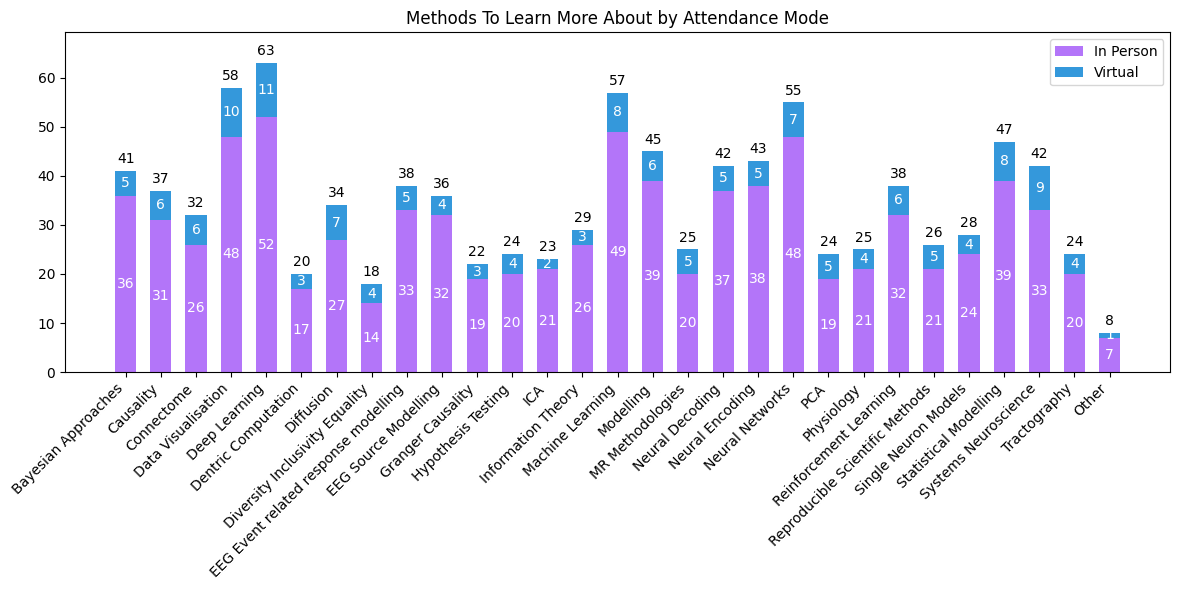

In [110]:
# Function to process methods by attendance mode
def get_methods_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    methods_mode = dict()
    question = 'During the BrainHack Vanderbilt, I would like to learn more about the following methods:'
    
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in methods_mode:
                methods_mode[j] += 1
            else:
                methods_mode[j] = 1
    return methods_mode

# Get distributions for both modes
virtual_methods = get_methods_by_mode(df, 'Virtually')
in_person_methods = get_methods_by_mode(df, 'In-person')

# Remove unwanted categories
for item in ["None"]:
    virtual_methods.pop(item, None)
    in_person_methods.pop(item, None)

# Define main categories
labels = [
    "Bayesian Approaches",
    "Causality",
    "Connectome",
    "Data Visualisation",
    "Deep Learning",
    "Dentric Computation",
    "Diffusion",
    "Diversity Inclusivity Equality",
    "EEG Event related response modelling",
    "EEG Source Modelling",
    "Granger Causality",
    "Hypothesis Testing",
    "ICA",
    "Information Theory",
    "Machine Learning",
    "Modelling",
    "MR Methodologies",
    "Neural Decoding",
    "Neural Encoding",
    "Neural Networks",
    "PCA",
    "Physiology",
    "Reinforcement Learning",
    "Reproducible Scientific Methods",
    "Single Neuron Models",
    "Statistical Modelling",
    "Systems Neuroscience",
    "Tractography",
    "Other"
]

# Process virtual data
virtual_filtered = {key: virtual_methods.get(key, 0) for key in labels}
virtual_filtered["Other"] = sum(value for key, value in virtual_methods.items() if key not in labels)

# Process in-person data
in_person_filtered = {key: in_person_methods.get(key, 0) for key in labels}
in_person_filtered["Other"] = sum(value for key, value in in_person_methods.items() if key not in labels)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Methods To Learn More About by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

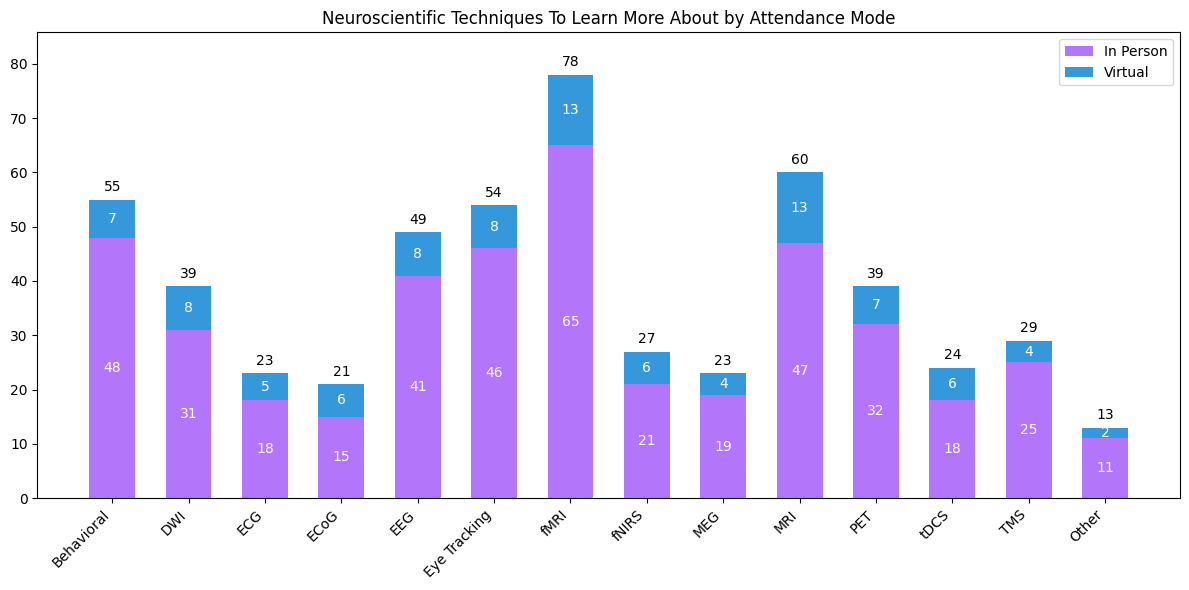

In [108]:
# Function to process neuroscientific techniques by attendance mode
def get_neuro_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    neuro_mode = dict()
    question = 'During the BrainHack Vanderbilt, I would like to learn more about the following neuroscientific techniques:'
    
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in neuro_mode:
                neuro_mode[j] += 1
            else:
                neuro_mode[j] = 1
    return neuro_mode

# Get distributions for both modes
virtual_neuro = get_neuro_by_mode(df, 'Virtually')
in_person_neuro = get_neuro_by_mode(df, 'In-person')

# Remove unwanted categories
for tech in ["None"]:
    virtual_neuro.pop(tech, None)
    in_person_neuro.pop(tech, None)

# Define main categories
labels = [
    "Behavioral",
    "DWI",
    "ECG",
    "ECoG",
    "EEG",
    "Eye Tracking",
    "fMRI",
    "fNIRS",
    "MEG",
    "MRI",
    "PET",
    "tDCS",
    "TMS"
]

# Process virtual data
virtual_filtered = {key: virtual_neuro.get(key, 0) for key in labels}
virtual_filtered["Other"] = sum(value for key, value in virtual_neuro.items() if key not in labels)

# Process in-person data
in_person_filtered = {key: in_person_neuro.get(key, 0) for key in labels}
in_person_filtered["Other"] = sum(value for key, value in in_person_neuro.items() if key not in labels)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Neuroscientific Techniques To Learn More About by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()

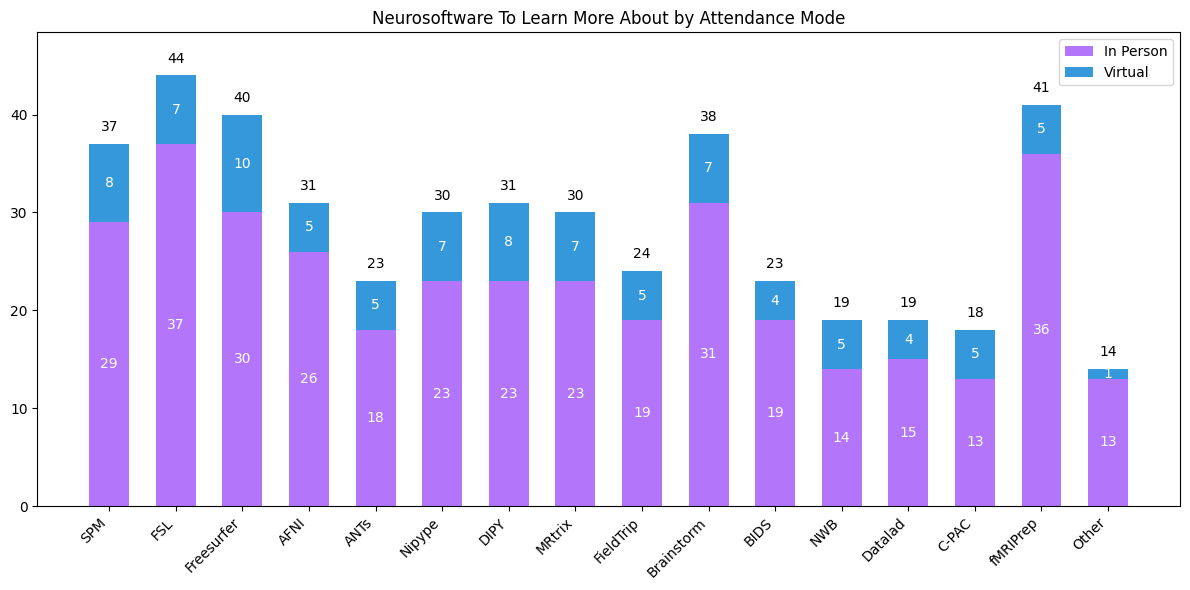

In [109]:
# Function to process neurosoftware by attendance mode
def get_software_by_mode(df, mode):
    mode_df = df[df['Will you be attending in-person or virtually?'] == mode]
    software_mode = dict()
    question = 'During the BrainHack Vanderbilt, I would like to learn more about the following neurosoftware:'
    for i in mode_df[question].dropna().values:
        result = i.split(", ")
        for j in result:
            if j in software_mode:
                software_mode[j] += 1
            else:
                software_mode[j] = 1
    return software_mode

# Get distributions for both modes
virtual_software = get_software_by_mode(df, 'Virtually')
in_person_software = get_software_by_mode(df, 'In-person')

# Remove unwanted categories
for item in ["None"]:
    virtual_software.pop(item, None)
    in_person_software.pop(item, None)

# Define main categories
neurosoftware_experience = [
    "SPM",
    "FSL",
    "Freesurfer",
    "AFNI",
    "ANTs",
    "Nipype",
    "DIPY",
    "MRtrix",
    "FieldTrip",
    "Brainstorm",
    "BIDS",
    "NWB",
    "Datalad",
    "C-PAC",
    "fMRIPrep",
]

# Process virtual data
virtual_filtered = {key: virtual_software.get(key, 0) for key in neurosoftware_experience}
virtual_filtered["Other"] = sum(value for key, value in virtual_software.items() if key not in neurosoftware_experience)

# Process in-person data
in_person_filtered = {key: in_person_software.get(key, 0) for key in neurosoftware_experience}
in_person_filtered["Other"] = sum(value for key, value in in_person_software.items() if key not in neurosoftware_experience)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

# Create bars
bars_in_person = plt.bar(virtual_filtered.keys(), 
                        [in_person_filtered[key] for key in virtual_filtered.keys()],
                        label='In Person',
                        color='#b375f9',
                        width=0.6)

bars_virtual = plt.bar(virtual_filtered.keys(), 
                      [virtual_filtered[key] for key in virtual_filtered.keys()],
                      bottom=[in_person_filtered[key] for key in virtual_filtered.keys()],
                      label='Virtual',
                      color='#3498db',
                      width=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Neurosoftware To Learn More About by Attendance Mode')
plt.legend()
plt.tight_layout()

# Add text on top of each stack
for i, (virtual_val, in_person_val) in enumerate(zip(virtual_filtered.values(), 
                                                    in_person_filtered.values())):
    # Total height for this bar
    total = virtual_val + in_person_val
    
    # Add in-person count if non-zero
    if in_person_val > 0:
        plt.text(i, in_person_val/2, 
                str(int(in_person_val)), 
                ha='center', va='center',
                color='white')
    
    # Add virtual count if non-zero
    if virtual_val > 0:
        plt.text(i, in_person_val + virtual_val/2, 
                str(int(virtual_val)), 
                ha='center', va='center',
                color='white')
    
    # Add total on top
    if total > 0:
        plt.text(i, total + 1, 
                str(int(total)), 
                ha='center', va='bottom',
                color='black')

# Adjust y-limit to accommodate the labels
plt.ylim(0, max([sum(x) for x in zip(virtual_filtered.values(), 
                                    in_person_filtered.values())]) * 1.1)

plt.show()